# Sales Analysis

In [5]:
import pandas as pd

df = pd.read_csv('sales_data_sample.csv', encoding='latin1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [7]:
print(df.isna().sum())

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [8]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

In [9]:
df['Revenue per Item'] = df['SALES']/df['QUANTITYORDERED']

In [10]:
df['STATE'] = df['STATE'].fillna('Unknown')
df['TERRITORY'] = df['TERRITORY'].fillna('Unknown')
df['POSTALCODE'] = df['POSTALCODE'].fillna(0)

## Analysis and Visualization

### 1. Sales Over Time

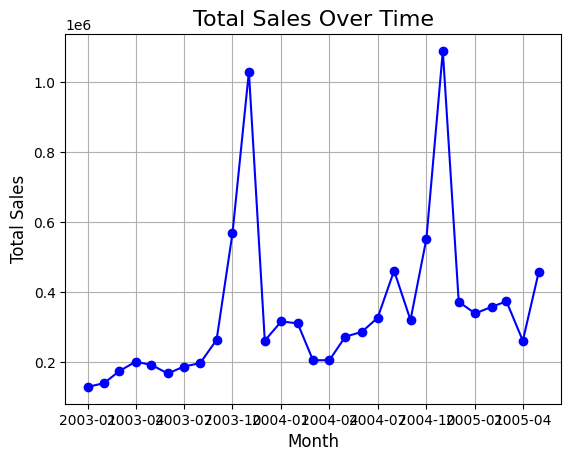

In [ ]:
import matplotlib.pyplot as plt

sales_by_month = df.groupby(df['ORDERDATE'].dt.to_period('M'))['SALES'].sum()
sales_by_month.index = sales_by_month.index.to_timestamp()
plt.plot(sales_by_month.index, sales_by_month.values, marker='o', color='b')
plt.title('Total Sales Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)
plt.show()

### 2. Product Line Performance

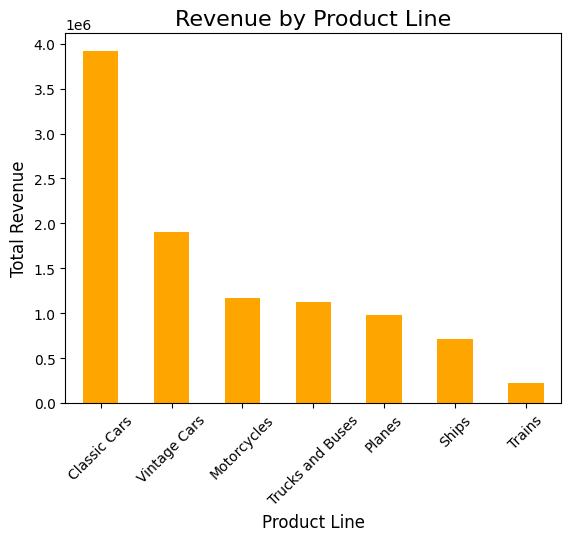

In [17]:
product_line_sales = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
product_line_sales.plot(kind='bar', color='orange')
plt.title('Revenue by Product Line', fontsize=16)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### 3. Top 5 Countries by Sales

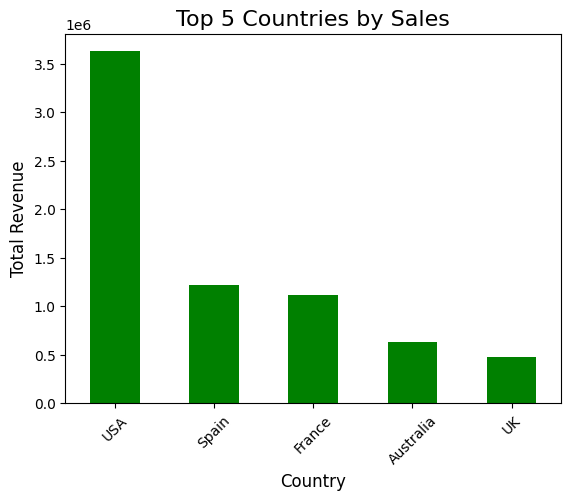

In [18]:
country_sales = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(5)
country_sales.plot(kind='bar', color='green')
plt.title('Top 5 Countries by Sales', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### 4. Order Size Distribution

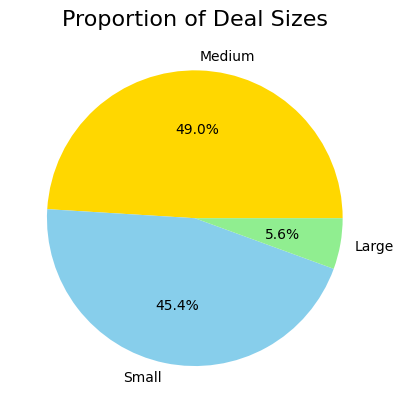

In [20]:
order_size_distribution = df['DEALSIZE'].value_counts(normalize=True) * 100
order_size_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'skyblue', 'lightgreen'])
plt.title('Proportion of Deal Sizes', fontsize=16)
plt.ylabel('')
plt.show()

#### Average Revenue per Order Size


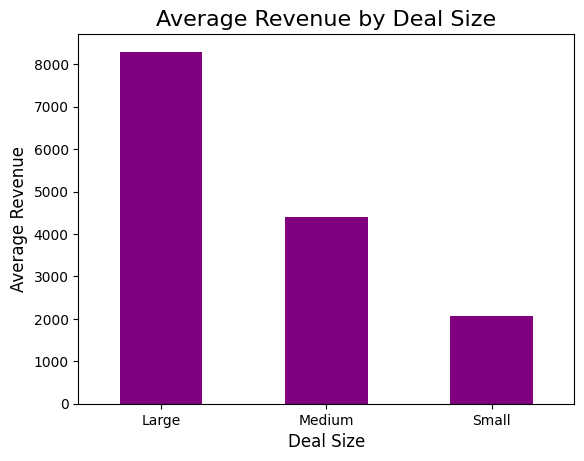

In [21]:
average_revenue_by_deal_size = df.groupby('DEALSIZE')['SALES'].mean()
average_revenue_by_deal_size.plot(kind='bar', color='purple')
plt.title('Average Revenue by Deal Size', fontsize=16)
plt.xlabel('Deal Size', fontsize=12)
plt.ylabel('Average Revenue', fontsize=12)
plt.xticks(rotation=0)
plt.show()

### 5. Order Status Analysis


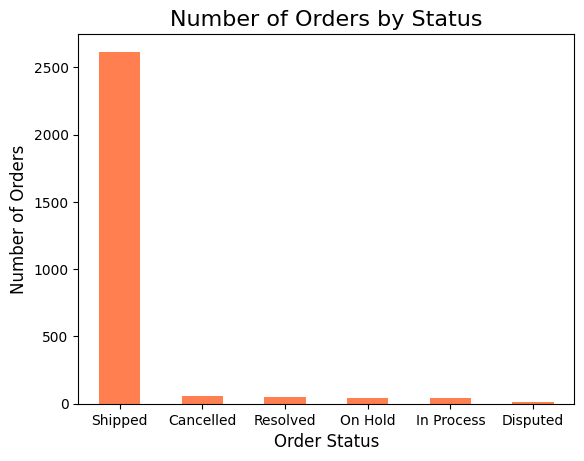

In [22]:
order_status_counts = df['STATUS'].value_counts()
order_status_counts.plot(kind='bar', color='coral')
plt.title('Number of Orders by Status', fontsize=16)
plt.xlabel('Order Status', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=0)
plt.show()

#### Impact of Order Status on Revenue


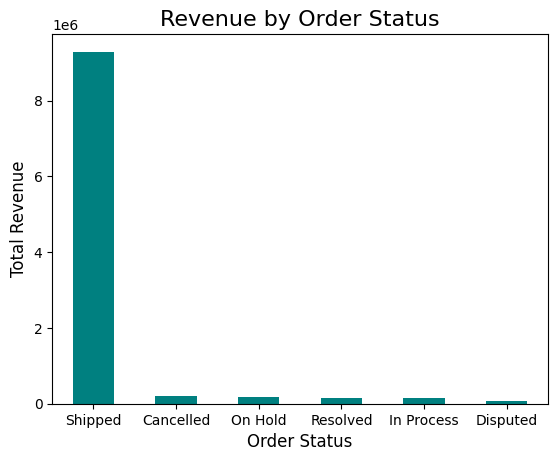

In [23]:
revenue_by_status = df.groupby('STATUS')['SALES'].sum().sort_values(ascending=False)
revenue_by_status.plot(kind='bar', color='teal')
plt.title('Revenue by Order Status', fontsize=16)
plt.xlabel('Order Status', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=0)
plt.show()